In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader
import datetime
import pandas_datareader.data as web
import matplotlib as mpl
import seaborn as sns

sns.set()
start = datetime.datetime(2015,1,1)
finish = datetime.datetime.now()

In [2]:
#Einzelwert
apple       = web.DataReader('AAPL','yahoo',start,finish)
wirecard    = web.DataReader('WDI.DE','yahoo',start,finish)
amzn        = web.DataReader('AMZN','yahoo',start,finish)
ibm         = web.DataReader('IBM','yahoo',start,finish)
tmv         = web.DataReader('TMV.DE','yahoo',start,finish)
cisco       = web.DataReader('CSCO','yahoo',start,finish)
rwe         = web.DataReader('RWE.DE','yahoo',start,finish)
applied_mat = web.DataReader('AMAT','yahoo',start,finish)
AMD         = web.DataReader('AMD','yahoo',start,finish)
hapaq       = web.DataReader('HLAG.DE','yahoo',start,finish)
toyota      = web.DataReader('TM','yahoo',start,finish)
eckert      = web.DataReader('EUZ.DE','yahoo',start,finish)
umicore     = web.DataReader('UMI.BR','yahoo',start,finish)


In [3]:
# Indices
dax = web.DataReader('^GDAXI','yahoo',start,finish)
volatility_index = web.DataReader('^VIX','yahoo',start,finish)
banken_index = web.DataReader('^STOXX','yahoo',start,finish)
dow_jones_utility = web.DataReader('^DJU','yahoo',start,finish)
nasdaq = web.DataReader('^IXIC','yahoo',start,finish)

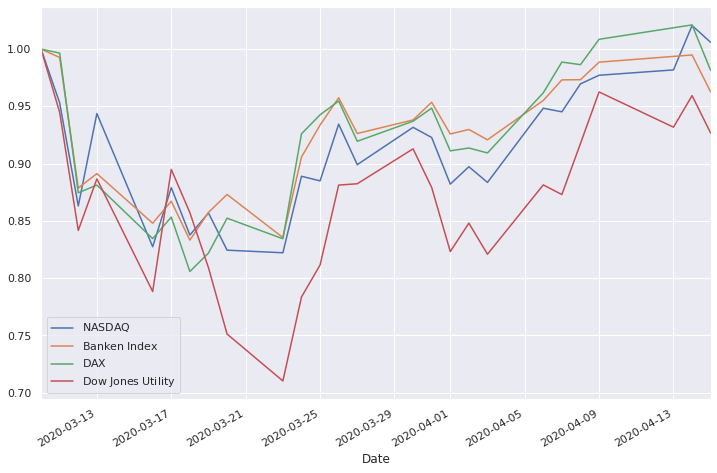

In [4]:
nasdaq['norm']=nasdaq['Close']['2020-03-10':]/nasdaq['Close']['2020-03-10']
banken_index['norm']=banken_index['Close']['2020-03-10':]/banken_index['Close']['2020-03-10']
dax['norm']=dax['Close']['2020-03-10':]/dax['Close']['2020-03-10']
dow_jones_utility['norm']=dow_jones_utility['Close']['2020-03-10':]/dow_jones_utility['Close']['2020-03-10']
nasdaq['norm']['2020-03-10':].plot(label='$\mathrm{NASDAQ}$',figsize=(12,8))
banken_index['norm']['2020-03-10':].plot(label='$\mathrm{Banken\; Index}$',figsize=(12,8))
dax['norm']['2020-03-10':].plot(label='$\mathrm{DAX}$',figsize=(12,8))
dow_jones_utility['norm']['2020-03-10':].plot(label='$\mathrm{Dow\; Jones\; Utility}$',figsize=(12,8))

plt.legend();

# relative Stärke

In [5]:
rel_st =[]
for stock_df in (apple,wirecard,amzn,ibm,tmv ,cisco,rwe,applied_mat,AMD,hapaq,toyota,eckert,umicore):
    stock_df['relative Stärke'] = stock_df['Close'].rolling(456).mean()
    stock_df['relative Stärke'] = stock_df['Close']*100/stock_df['relative Stärke']
    rel_st =  np.append(rel_st,stock_df['relative Stärke'][-1])

In [6]:
all_pos_rel = [apple['relative Stärke'],
                wirecard['relative Stärke'],
                amzn['relative Stärke'],
                ibm['relative Stärke'],
                cisco['relative Stärke'],
                rwe['relative Stärke'],
                applied_mat['relative Stärke'],
                AMD['relative Stärke'],
                toyota['relative Stärke'],
                eckert['relative Stärke'],
                umicore['relative Stärke']]
relative_staerke = pd.concat(all_pos_rel,axis = 1)
relative_staerke.columns = ['Apple',
                         'Wirecard',
                         'Amazon',
                         'IBM',
                         'Cisco',
                         'RWE',
                         'Applied Materials',
                         'Advanced Micro',
                         'Toyota',
                         'Eckert und Ziegler',
                         'Umicore']
relative_staerke.tail()

,Apple,Wirecard,Amazon,IBM,Cisco,RWE,Applied Materials,Advanced Micro,Toyota,Eckert und Ziegler,Umicore
Date,,,,,,,,,,,
2020-04-08,122.028477,80.715378,113.198759,87.850119,87.099005,103.974542,112.230449,161.829159,96.921458,122.766333,91.092392
2020-04-09,122.811154,81.534943,113.141610,89.510874,85.984027,108.395667,108.145551,160.105089,96.841313,122.251130,94.553779
2020-04-13,125.111554,NaN,120.063121,89.285842,86.036006,NaN,108.771065,168.158970,95.178569,NaN,NaN
2020-04-14,131.297523,88.085950,126.317009,91.347562,89.296018,107.661732,114.397680,180.827627,97.847961,124.457504,97.884645
2020-04-15,129.970103,84.859588,127.575261,87.531255,86.672491,104.822009,109.811906,180.512486,96.568713,120.659500,93.926774


# Normalize

In [7]:
for stock_df in (apple,wirecard,amzn,ibm,cisco,rwe,applied_mat,AMD,toyota,eckert,umicore):
    stock_df['Normed Return'] = stock_df['Close'] / stock_df.iloc[0]['Close']
    
    

# Allocation

In [8]:
for stock_df , allo in list(zip((apple,
                                 wirecard,
                                 amzn,
                                 ibm,
                                 cisco,
                                 rwe,
                                 applied_mat,
                                 AMD,
                                 toyota,
                                 eckert,
                                 umicore),
                                [.07,.07,.07,.07,.07,.07,.07,.07,.07,.07,.07,.07,.07])):
    stock_df['Allocation'] = stock_df['Normed Return']*allo


# Value

In [9]:
for stock_df in (apple,wirecard,amzn,ibm,cisco,rwe,applied_mat,AMD,toyota,eckert,umicore):
    stock_df['Position Values'] = stock_df['Allocation']*25000

In [10]:
all_pos_vals = [apple['Position Values'],
                wirecard['Position Values'],
                amzn['Position Values'],
                ibm['Position Values'],
                cisco['Position Values'],
                rwe['Position Values'],
                applied_mat['Position Values'],
                AMD['Position Values'],
                toyota['Position Values'],
                eckert['Position Values'],
                umicore['Position Values']]
portfolio_val = pd.concat(all_pos_vals,axis = 1)

In [11]:
portfolio_val.columns = ['Apple',
                         'Wirecard',
                         'Amazon',
                         'IBM',
                         'Cisco',
                         'RWE',
                         'Applied Materials',
                         'Advanced Micro',
                         'Toyota',
                         'Eckert und Ziegler',
                         'Umicore']

In [12]:

portfolio_val['Total Pos Sum'] = portfolio_val.sum(axis=1)
portfolio_dropna=portfolio_val.dropna()

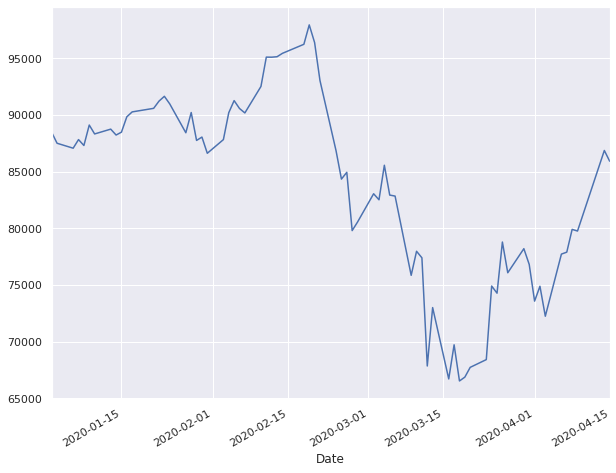

In [13]:
portfolio_dropna['Total Pos Sum']['2020-01-01':].plot(figsize=(10,8))


In [14]:
portfolio_val['Total Pos Sum'].argmin()

/home/dominik/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.
  """Entry point for launching an IPython kernel.


Timestamp('2015-05-25 00:00:00')

In [15]:
print(portfolio_val['Total Pos Sum']['2015-05-25'])

2406.1831101387447


In [16]:
wirecard['Normed Return']

Date
2015-01-02    1.000000
2015-01-05    0.992919
2015-01-06    0.982088
2015-01-07    0.995140
2015-01-08    1.037212
                ...   
2020-04-07    3.057484
2020-04-08    3.104693
2020-04-09    3.134685
2020-04-14    3.385171
2020-04-15    3.259650
Name: Normed Return, Length: 1340, dtype: float64

In [17]:
portfolio_val.dropna()

,Apple,Wirecard,Amazon,IBM,Cisco,RWE,Applied Materials,Advanced Micro,Toyota,Eckert und Ziegler,Umicore,Total Pos Sum
Date,,,,,,,,,,,,
2015-01-02,1750.000000,1750.000000,1750.000000,1750.000000,1750.000000,1750.000000,1750.000000,1750.000000,1750.000000,1750.000000,1750.000000,19250.000000
2015-01-05,1700.699688,1737.607742,1714.094785,1722.463869,1715.139370,1670.609362,1693.910308,1743.445699,1717.971735,1754.154584,1728.064820,18898.161962
2015-01-06,1700.859788,1718.654702,1674.956351,1685.317271,1714.505528,1656.298677,1630.108233,1723.782797,1700.286468,1560.274305,1721.377262,18486.421382
2015-01-07,1724.709566,1741.495455,1692.710496,1674.302786,1730.351235,1642.669342,1645.532865,1691.011138,1743.037320,1587.971588,1708.804723,18582.596513
2015-01-08,1790.976819,1815.120810,1704.281744,1710.693576,1743.661693,1678.105510,1698.117001,1710.674040,1776.597489,1606.436268,1739.834986,18974.499936
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-04-07,4152.588307,5350.597232,11410.281611,1241.176153,2575.878209,1644.372976,3334.535475,31172.284654,1697.501439,11642.046859,3684.041713,77905.304627
2020-04-08,4258.872268,5433.213398,11588.390144,1288.149480,2645.599468,1676.401875,3607.972825,31978.464106,1720.339021,12011.343265,3706.511809,79915.257659
2020-04-09,4289.604638,5485.698539,11587.028862,1312.014089,2611.372682,1748.637040,3476.863119,31709.737622,1718.528762,11983.645806,3844.543093,79767.674252


In [18]:
stocks = pd.concat([apple['Close'],
                    wirecard['Close'],
                    amzn['Close'],
                    ibm['Close'],
                    cisco['Close'],
                    rwe['Close'],
                    applied_mat['Close'],
                    AMD['Close'],
                    toyota['Close'],
                    eckert['Close'],
                    umicore['Close'],
                    tmv['Close'],
                    hapaq['Close']],axis=1)
stocks.columns = ['Apple',
                  'Wirecard',
                  'Amazon',
                  'IBM',
                  'Cisco',
                  'RWE',
                  'Applied Materials',
                  'Advanced Micro',
                  'Toyota',
                  'Eckert und Ziegler',
                  'Umicore',
                  'Teamviewer',
                  'Hapaq Loyd']

In [19]:
stocks.pct_change(1).mean()

Apple                 0.000859
Wirecard              0.001267
Amazon                0.001653
IBM                  -0.000111
Cisco                 0.000434
RWE                   0.000248
Applied Materials     0.000793
Advanced Micro        0.003012
Toyota                0.000063
Eckert und Ziegler    0.001688
Umicore               0.000770
Teamviewer            0.003662
Hapaq Loyd            0.001507
dtype: float64

In [20]:
log_return = np.log(stocks/stocks.shift(1))

In [21]:
#log_return.hist(bins=100,figsize=(30,16))
#plt.tight_layout

In [22]:
from pandas.plotting import scatter_matrix
#scatter_matrix(stocks,figsize=(30,30),alpha=0.2,hist_kwds={'bins':50});

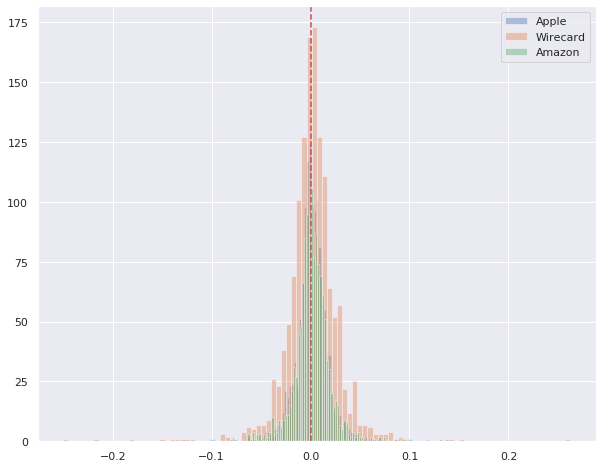

In [23]:


apple['Close'].pct_change(1).hist(bins=100,label='Apple',figsize=(10,8),alpha=0.4)
wirecard['Close'].pct_change(1).hist(bins=100,label='Wirecard',figsize=(10,8),alpha=0.4)
amzn['Close'].pct_change(1).hist(bins=100,label='Amazon',figsize=(10,8),alpha=0.4)
plt.axvline(0.0, c='r', ls='--')
plt.legend()

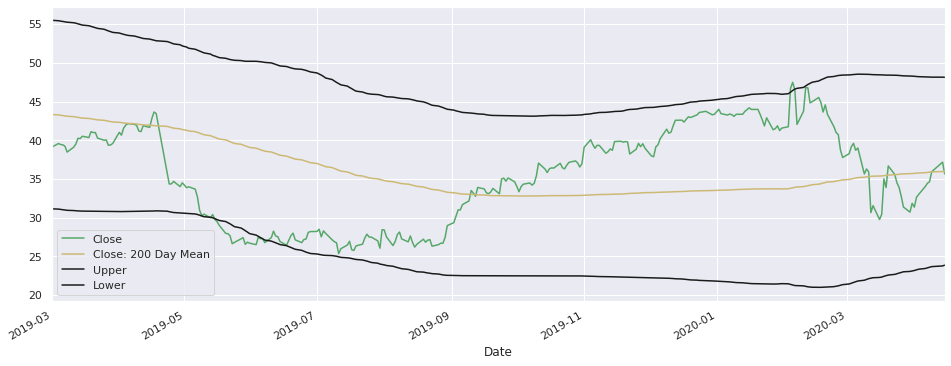

In [24]:
# Close 20 MA
umicore['Close: 200 Day Mean'] = umicore['Close'].rolling(200).mean()
# Upper = 20 MA + 2*std(20)
umicore['Upper'] = umicore['Close: 200 Day Mean']+2*(umicore['Close'].rolling(200).std())
# Lower = 20 MA - 2*strd(20)
umicore['Lower'] = umicore['Close: 200 Day Mean']-2*(umicore['Close'].rolling(200).std())
# Close
umicore[['Close','Close: 200 Day Mean','Upper','Lower']]['2019-03-01':].plot(figsize=(16,6),color=['g','y','k','k'])


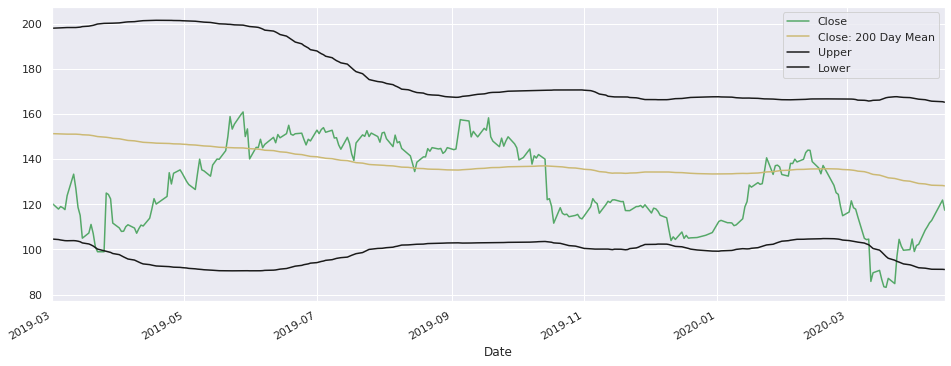

In [25]:
# Close 20 MA
wirecard['Close: 200 Day Mean'] = wirecard['Close'].rolling(200).mean()
# Upper = 20 MA + 2*std(20)
wirecard['Upper'] = wirecard['Close: 200 Day Mean']+2*(wirecard['Close'].rolling(200).std())
# Lower = 20 MA - 2*strd(20)
wirecard['Lower'] = wirecard['Close: 200 Day Mean']-2*(wirecard['Close'].rolling(200).std())
# Close
wirecard[['Close','Close: 200 Day Mean','Upper','Lower']]['2019-03-01':].plot(figsize=(16,6),color=['g','y','k','k'])


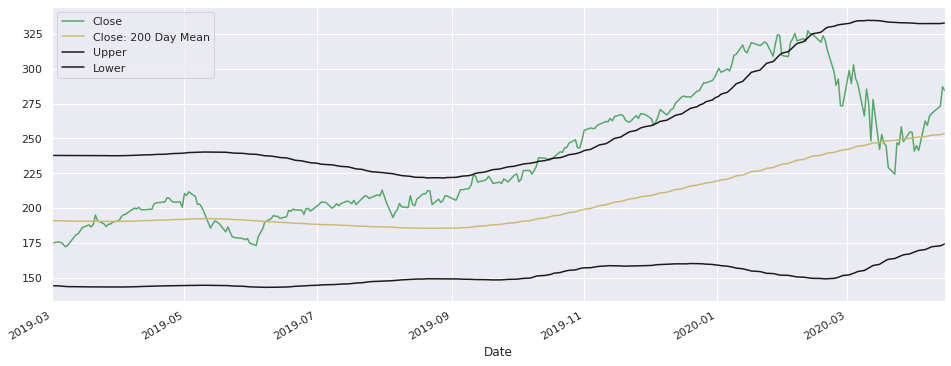

In [26]:
# Close 20 MA
apple['Close: 200 Day Mean'] = apple['Close'].rolling(200).mean()
# Upper = 20 MA + 2*std(20)
apple['Upper'] = apple['Close: 200 Day Mean']+2*(apple['Close'].rolling(200).std())
# Lower = 20 MA - 2*strd(20)
apple['Lower'] = apple['Close: 200 Day Mean']-2*(apple['Close'].rolling(200).std())
# Close
apple[['Close','Close: 200 Day Mean','Upper','Lower']]['2019-03-01':].plot(figsize=(16,6),color=['g','y','k','k'])


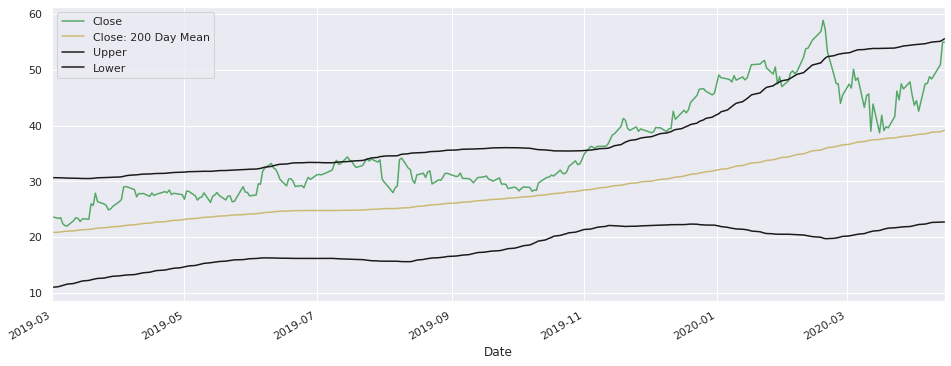

In [27]:
# Close 20 MA
AMD['Close: 200 Day Mean'] = AMD['Close'].rolling(200).mean()
# Upper = 20 MA + 2*std(20)
AMD['Upper'] = AMD['Close: 200 Day Mean']+2*(AMD['Close'].rolling(200).std())
# Lower = 20 MA - 2*strd(20)
AMD['Lower'] = AMD['Close: 200 Day Mean']-2*(AMD['Close'].rolling(200).std())
# Close
AMD[['Close','Close: 200 Day Mean','Upper','Lower']]['2019-03-01':].plot(figsize=(16,6),color=['g','y','k','k'])


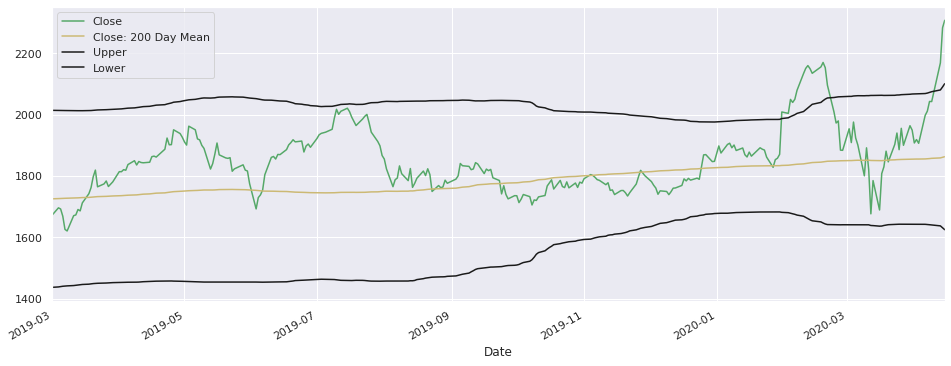

In [28]:
# Close 20 MA
amzn['Close: 200 Day Mean'] = amzn['Close'].rolling(200).mean()
# Upper = 20 MA + 2*std(20)
amzn['Upper'] = amzn['Close: 200 Day Mean']+2*(amzn['Close'].rolling(200).std())
# Lower = 20 MA - 2*strd(20)
amzn['Lower'] = amzn['Close: 200 Day Mean']-2*(amzn['Close'].rolling(200).std())
# Close
amzn[['Close','Close: 200 Day Mean','Upper','Lower']]['2019-03-01':].plot(figsize=(16,6),color=['g','y','k','k'])


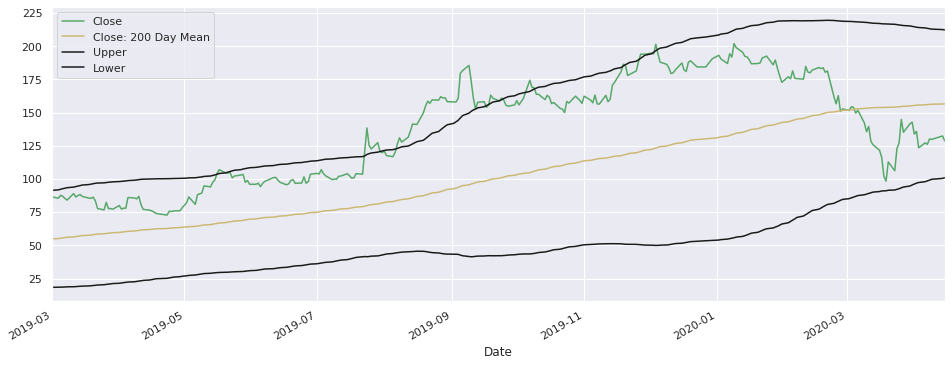

In [29]:
# Close 20 MA
eckert['Close: 200 Day Mean'] = eckert['Close'].rolling(200).mean()
# Upper = 20 MA + 2*std(20)
eckert['Upper'] = eckert['Close: 200 Day Mean']+2*(eckert['Close'].rolling(200).std())
# Lower = 20 MA - 2*strd(20)
eckert['Lower'] = eckert['Close: 200 Day Mean']-2*(eckert['Close'].rolling(200).std())
# Close
eckert[['Close','Close: 200 Day Mean','Upper','Lower']]['2019-03-01':].plot(figsize=(16,6),color=['g','y','k','k'])


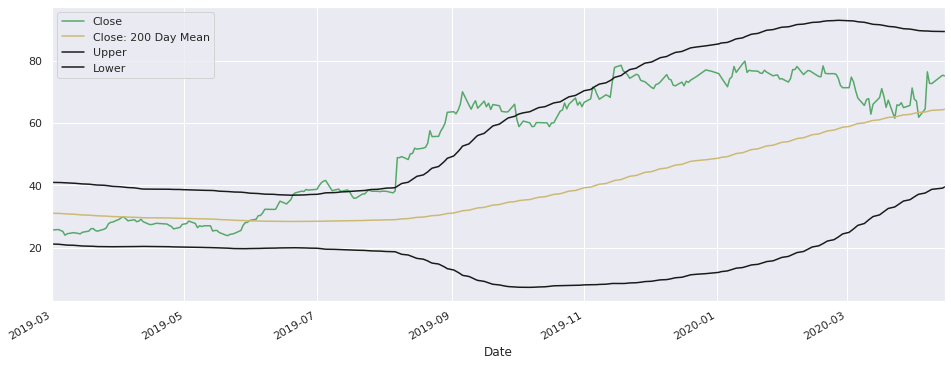

In [30]:
# Close 20 MA
hapaq['Close: 200 Day Mean'] = hapaq['Close'].rolling(200).mean()
# Upper = 20 MA + 2*std(20)
hapaq['Upper'] = hapaq['Close: 200 Day Mean']+2*(hapaq['Close'].rolling(200).std())
# Lower = 20 MA - 2*strd(20)
hapaq['Lower'] = hapaq['Close: 200 Day Mean']-2*(hapaq['Close'].rolling(200).std())
# Close
hapaq[['Close','Close: 200 Day Mean','Upper','Lower']]['2019-03-01':].plot(figsize=(16,6),color=['g','y','k','k'])


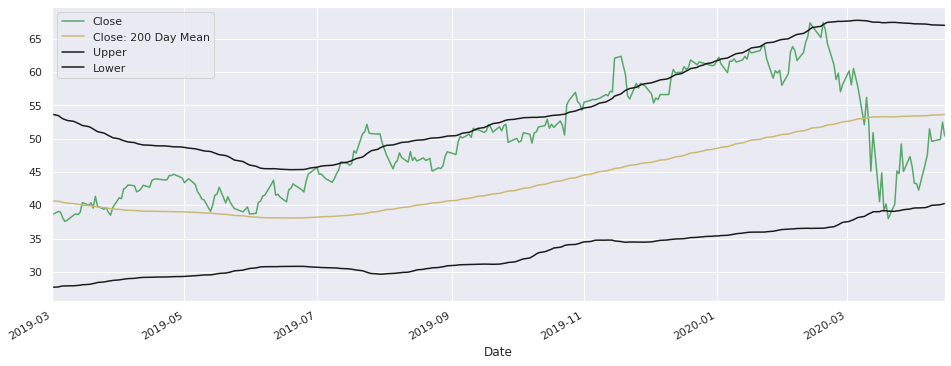

In [31]:
# Close 20 MA
applied_mat['Close: 200 Day Mean'] = applied_mat['Close'].rolling(200).mean()
# Upper = 20 MA + 2*std(20)
applied_mat['Upper'] = applied_mat['Close: 200 Day Mean']+2*(applied_mat['Close'].rolling(200).std())
# Lower = 20 MA - 2*strd(20)
applied_mat['Lower'] = applied_mat['Close: 200 Day Mean']-2*(applied_mat['Close'].rolling(200).std())
# Close
applied_mat[['Close','Close: 200 Day Mean','Upper','Lower']]['2019-03-01':].plot(figsize=(16,6),color=['g','y','k','k'])


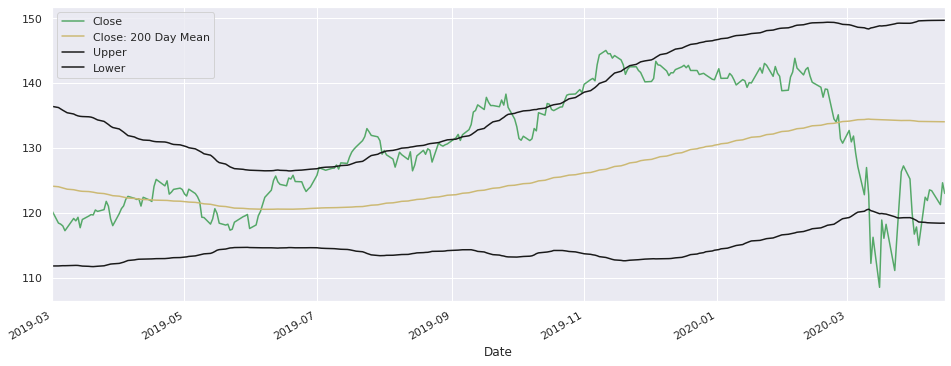

In [32]:
# Close 20 MA
toyota['Close: 200 Day Mean'] = toyota['Close'].rolling(200).mean()
# Upper = 20 MA + 2*std(20)
toyota['Upper'] = toyota['Close: 200 Day Mean']+2*(toyota['Close'].rolling(200).std())
# Lower = 20 MA - 2*strd(20)
toyota['Lower'] = toyota['Close: 200 Day Mean']-2*(toyota['Close'].rolling(200).std())
# Close
toyota[['Close','Close: 200 Day Mean','Upper','Lower']]['2019-03-01':].plot(figsize=(16,6),color=['g','y','k','k'])


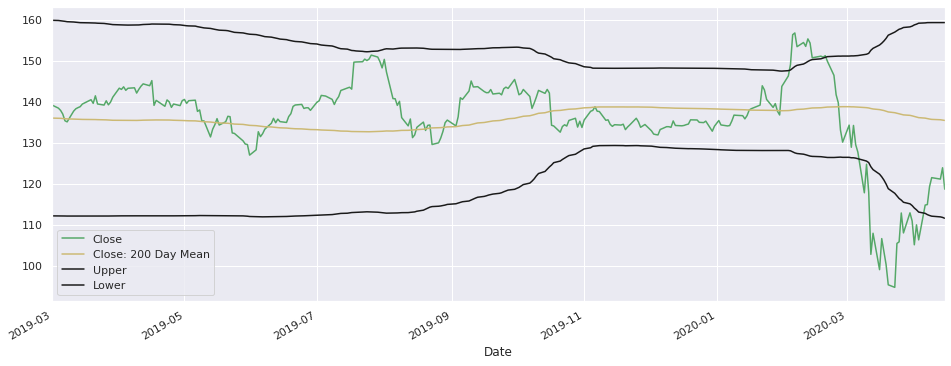

In [33]:
# Close 20 MA
ibm['Close: 200 Day Mean'] = ibm['Close'].rolling(200).mean()
# Upper = 20 MA + 2*std(20)
ibm['Upper'] = ibm['Close: 200 Day Mean']+2*(ibm['Close'].rolling(200).std())
# Lower = 20 MA - 2*strd(20)
ibm['Lower'] = ibm['Close: 200 Day Mean']-2*(ibm['Close'].rolling(200).std())
# Close
ibm[['Close','Close: 200 Day Mean','Upper','Lower']]['2019-03-01':].plot(figsize=(16,6),color=['g','y','k','k'])


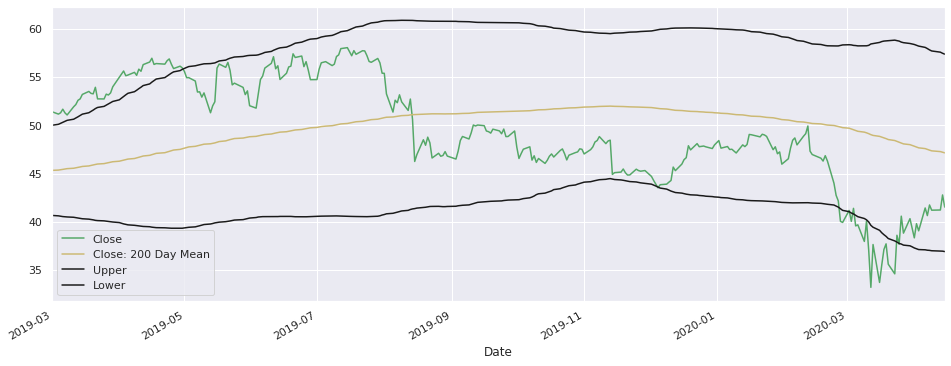

In [34]:
# Close 20 MA
cisco['Close: 200 Day Mean'] = cisco['Close'].rolling(200).mean()
# Upper = 20 MA + 2*std(20)
cisco['Upper'] = cisco['Close: 200 Day Mean']+2*(cisco['Close'].rolling(200).std())
# Lower = 20 MA - 2*strd(20)
cisco['Lower'] = cisco['Close: 200 Day Mean']-2*(cisco['Close'].rolling(200).std())
# Close
cisco[['Close','Close: 200 Day Mean','Upper','Lower']]['2019-03-01':].plot(figsize=(16,6),color=['g','y','k','k'])


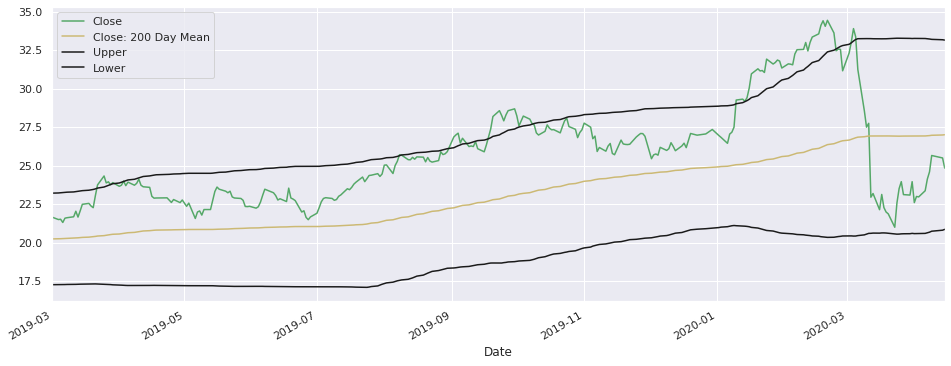

In [35]:
# Close 20 MA
rwe['Close: 200 Day Mean'] = rwe['Close'].rolling(200).mean()
# Upper = 20 MA + 2*std(20)
rwe['Upper'] = rwe['Close: 200 Day Mean']+2*(rwe['Close'].rolling(200).std())
# Lower = 20 MA - 2*strd(20)
rwe['Lower'] = rwe['Close: 200 Day Mean']-2*(rwe['Close'].rolling(200).std())
# Close
rwe[['Close','Close: 200 Day Mean','Upper','Lower']]['2019-03-01':].plot(figsize=(16,6),color=['g','y','k','k'])


In [36]:
delta     = web.DataReader('DAL','yahoo',start,finish)


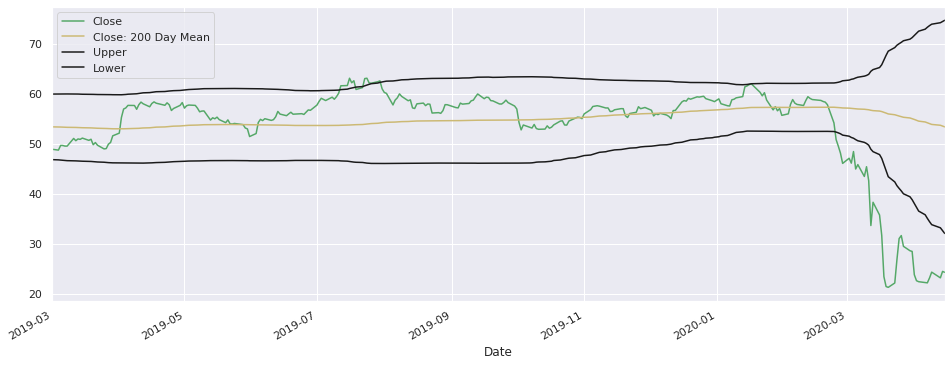

In [37]:
# Close 20 MA
delta['Close: 200 Day Mean'] = delta['Close'].rolling(200).mean()
# Upper = 20 MA + 2*std(20)
delta['Upper'] = delta['Close: 200 Day Mean']+2*(delta['Close'].rolling(200).std())
# Lower = 20 MA - 2*strd(20)
delta['Lower'] = delta['Close: 200 Day Mean']-2*(delta['Close'].rolling(200).std())
# Close
delta[['Close','Close: 200 Day Mean','Upper','Lower']]['2019-03-01':].plot(figsize=(16,6),color=['g','y','k','k'])
